In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc ('font',family='Malgun Gothic')

data loading

In [3]:
dream=pd.read_csv('드림열처리_센서_1214.csv',encoding='CP949')

In [3]:
dream.head()

,id,company,equip,process,status,measuredt,crtdt,id.1,sensor_id,point,description,unit,type,value
0,21731,드림열처리,7호기,침탄로,working,2021-11-01 0:00,2021-11-01 0:00,155414,21731,M0000,RX 자동/수동,,bit,0.0
1,21735,드림열처리,7호기,침탄로,working,2021-11-01 0:01,2021-11-01 0:01,155453,21735,M0000,RX 자동/수동,,bit,0.0
2,21741,드림열처리,7호기,침탄로,working,2021-11-01 0:02,2021-11-01 0:02,155500,21741,M0000,RX 자동/수동,,bit,0.0
3,21746,드림열처리,7호기,침탄로,working,2021-11-01 0:03,2021-11-01 0:03,155543,21746,M0000,RX 자동/수동,,bit,0.0
4,21750,드림열처리,7호기,침탄로,working,2021-11-01 0:04,2021-11-01 0:04,155582,21750,M0000,RX 자동/수동,,bit,0.0


In [ ]:
dream.size

In [5]:
dream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377276 entries, 0 to 377275
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           377276 non-null  int64  
 1   company      377276 non-null  object 
 2   equip        377276 non-null  object 
 3   process      377276 non-null  object 
 4   status       377276 non-null  object 
 5   measuredt    377276 non-null  object 
 6   crtdt        377276 non-null  object 
 7   id.1         377276 non-null  int64  
 8   sensor_id    377276 non-null  int64  
 9   point        377276 non-null  object 
 10  description  377276 non-null  object 
 11  unit         377276 non-null  object 
 12  type         377276 non-null  object 
 13  value        377276 non-null  float64
dtypes: float64(1), int64(3), object(10)
memory usage: 40.3+ MB


Null check

In [11]:
dream.isnull().sum()

id             0
company        0
equip          0
process        0
status         0
measuredt      0
crtdt          0
id.1           0
sensor_id      0
point          0
description    0
unit           0
type           0
value          0
dtype: int64

In [59]:
pd.pivot_table(dream,index=['description'])

,id,id.1,sensor_id,value
description,,,,
CP 농도,226394.517560,1.817759e+06,226394.517560,8.912282
LNG순간유량,226396.331608,1.817773e+06,226396.331608,1.460637
RX VALVE,226380.243070,1.817652e+06,226380.243070,0.384321
RX 순간유량,226395.114690,1.817763e+06,226395.114690,37.745321
RX 자동/수동,186457.469110,1.511774e+06,186457.469110,0.000112
RX 자동_수동,419079.179645,3.294071e+06,419079.179645,0.000000
가열로히터온도,226392.619752,1.817745e+06,226392.619752,2467.428709
설정유량,226370.257404,1.817576e+06,226370.257404,0.320303


extract features from description and make new columns

In [4]:
CP_농도=dream.loc[dream['description']=='CP 농도'][['measuredt','sensor_id','value']].rename(columns={"value":"CP농도"})
LNG순간유량=dream.loc[dream['description']=='LNG순간유량'][['measuredt','sensor_id','value']].rename(columns={"value":"LNG순간유량"})
RX_VALVE=dream.loc[dream['description']=='RX VALVE'][['measuredt','sensor_id','value']].rename(columns={"value":"RX_VALVE"})
RX_순간유량=dream.loc[dream['description']=='RX 순간유량'][['measuredt','sensor_id','value']].rename(columns={"value":"RX_순간유량"})

In [ ]:
CP_농도.

In [5]:
RX자동수동=dream.loc[dream['description']=='RX 자동/수동'][['measuredt','sensor_id','value']].rename(columns={"value":"RX자동/수동"})
RX_자동_수동=dream.loc[dream['description']=='RX 자동_수동'][['measuredt','sensor_id','value']].rename(columns={"value":"RX_자동_소동"})
가열로히터온도=dream.loc[dream['description']=='가열로히터온도'][['measuredt','sensor_id','value']].rename(columns={"value":"가열로히터온도"})
설정유량=dream.loc[dream['description']=='설정유량'][['measuredt','sensor_id','value']].rename(columns={"value":"설정유량"})

Note: RX자동/수동, RX 자동_수동 contain value of zero,0.

In [64]:
dream.loc[dream['description']=='RX 자동_수동']

,id,company,equip,process,status,measuredt,crtdt,id.1,sensor_id,point,description,unit,type,value
44637,395112,드림열처리,7호기,침탄로,working,2021-12-07 14:22,2021-12-07 14:22,3086415,395112,M0000,RX 자동_수동,,bit,0.0
44638,395118,드림열처리,7호기,침탄로,working,2021-12-07 14:23,2021-12-07 14:23,3086464,395118,M0000,RX 자동_수동,,bit,0.0
44639,395124,드림열처리,7호기,침탄로,working,2021-12-07 14:24,2021-12-07 14:24,3086513,395124,M0000,RX 자동_수동,,bit,0.0
44640,395129,드림열처리,7호기,침탄로,working,2021-12-07 14:25,2021-12-07 14:25,3086558,395129,M0000,RX 자동_수동,,bit,0.0
44641,395135,드림열처리,7호기,침탄로,working,2021-12-07 14:26,2021-12-07 14:26,3086607,395135,M0000,RX 자동_수동,,bit,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53883,441674,드림열처리,7호기,침탄로,working,2021-12-14 4:14,2021-12-14 4:14,3496671,441674,M0000,RX 자동_수동,,bit,0.0
53884,441678,드림열처리,7호기,침탄로,working,2021-12-14 4:15,2021-12-14 4:15,3496710,441678,M0000,RX 자동_수동,,bit,0.0
53885,441682,드림열처리,7호기,침탄로,working,2021-12-14 4:16,2021-12-14 4:16,3496749,441682,M0000,RX 자동_수동,,bit,0.0
53886,441686,드림열처리,7호기,침탄로,working,2021-12-14 4:17,2021-12-14 4:17,3496788,441686,M0000,RX 자동_수동,,bit,0.0


In [84]:
dream.loc[dream['description']==].isnull().sum()

id             0
company        0
equip          0
process        0
status         0
measuredt      0
crtdt          0
id.1           0
sensor_id      0
point          0
description    0
unit           0
type           0
value          0
dtype: int64

In [83]:
dream.loc[dream['description']=='설정유량']

,id,company,equip,process,status,measuredt,crtdt,id.1,sensor_id,point,description,unit,type,value
323388,21731,드림열처리,7호기,침탄로,working,2021-11-01 0:00,2021-11-01 0:00,155413,21731,P0012,설정유량,%,float,0.0
323389,21735,드림열처리,7호기,침탄로,working,2021-11-01 0:01,2021-11-01 0:01,155452,21735,P0012,설정유량,%,float,0.0
323390,21741,드림열처리,7호기,침탄로,working,2021-11-01 0:02,2021-11-01 0:02,155499,21741,P0012,설정유량,%,float,0.0
323391,21746,드림열처리,7호기,침탄로,working,2021-11-01 0:03,2021-11-01 0:03,155542,21746,P0012,설정유량,%,float,0.0
323392,21750,드림열처리,7호기,침탄로,working,2021-11-01 0:04,2021-11-01 0:04,155581,21750,P0012,설정유량,%,float,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377271,441674,드림열처리,7호기,침탄로,working,2021-12-14 4:14,2021-12-14 4:14,3496670,441674,P0012,설정유량,%,float,0.0
377272,441678,드림열처리,7호기,침탄로,working,2021-12-14 4:15,2021-12-14 4:15,3496709,441678,P0012,설정유량,%,float,0.0
377273,441682,드림열처리,7호기,침탄로,working,2021-12-14 4:16,2021-12-14 4:16,3496748,441682,P0012,설정유량,%,float,0.0
377274,441686,드림열처리,7호기,침탄로,working,2021-12-14 4:17,2021-12-14 4:17,3496787,441686,P0012,설정유량,%,float,0.0


In [6]:
process=dream[['measuredt','sensor_id','process']]

In [96]:
process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377276 entries, 0 to 377275
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   measuredt  377276 non-null  object
 1   sensor_id  377276 non-null  int64 
 2   process    377276 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.6+ MB


In [100]:
pd.pivot_table(dream,index=['process'])

,id,id.1,sensor_id,value
process,,,,
침탄로,226385.621444,1.817692e+06,226385.621444,359.481074


In [85]:
설정유량.describe()

,sensor_id,설정유량
count,53888.000000,53888.000000
mean,226370.257404,0.320303
std,136024.757749,33.251115
min,21731.000000,0.000000
25%,100673.500000,0.000000
50%,208172.500000,0.000000
75%,372353.000000,0.000000
max,441690.000000,3452.100000


In [89]:
RX_VALVE.describe()

,sensor_id,RX_VALVE
count,53894.000000,53894.000000
mean,226380.243070,0.384321
std,136022.530927,36.422406
min,21731.000000,0.000000
25%,100684.000000,0.000000
50%,208185.000000,0.000000
75%,372355.000000,0.000000
max,441690.000000,3452.100000


In [90]:
CP_농도.describe()

,sensor_id,CP농도
count,53901.000000,53901.000000
mean,226394.517560,8.912282
std,136023.315949,39.392964
min,21731.000000,0.000000
25%,100696.000000,6.400000
50%,208197.000000,8.800000
75%,372368.000000,10.000000
max,441690.000000,3452.100000


In [8]:
CP_농도.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53901 entries, 53888 to 107788
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measuredt  53901 non-null  object 
 1   sensor_id  53901 non-null  int64  
 2   CP농도       53901 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [9]:
LNG순간유량.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53904 entries, 215585 to 269488
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measuredt  53904 non-null  object 
 1   sensor_id  53904 non-null  int64  
 2   LNG순간유량    53904 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
RX_순간유량.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 107789 to 161690
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measuredt  53902 non-null  object 
 1   sensor_id  53902 non-null  int64  
 2   RX_순간유량    53902 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


In [11]:
가열로히터온도.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53899 entries, 269489 to 323387
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measuredt  53899 non-null  object 
 1   sensor_id  53899 non-null  int64  
 2   가열로히터온도    53899 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


?

In [103]:
LNG순간유량.dtypes

measuredt     object
sensor_id      int64
LNG순간유량      float64
dtype: object

In [100]:
type(가열로히터온도)

pandas.core.frame.DataFrame

In [7]:
data_frames=[가열로히터온도,LNG순간유량,RX_순간유량,CP_농도]

In [8]:
import pandas as pd
from functools import reduce 
dream2=reduce(lambda left,right: pd.merge(left,right,on=['measuredt','sensor_id'],how='outer'),data_frames)
#dream2=reduce(lambda left,right: pd.merge(left,right,on=['measuredt'],how='outer'),data_frames)

In [109]:
dream2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53904 entries, 0 to 53903
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measuredt  53904 non-null  object 
 1   sensor_id  53904 non-null  int64  
 2   가열로히터온도    53899 non-null  float64
 3   LNG순간유량    53904 non-null  float64
 4   RX_순간유량    53902 non-null  float64
 5   CP농도       53901 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.9+ MB


In [57]:
#dream2.set_index('measuredt',inplace=True)

In [15]:
LNG순간유량.tail(11)

,measuredt,sensor_id,LNG순간유량
269478,2021-12-14 4:07,441648,0.0
269479,2021-12-14 4:08,441652,0.0
269480,2021-12-14 4:09,441656,0.0
269481,2021-12-14 4:11,441662,0.0
269482,2021-12-14 4:12,441666,0.0
269483,2021-12-14 4:13,441670,0.0
269484,2021-12-14 4:14,441674,0.0
269485,2021-12-14 4:15,441678,0.0
269486,2021-12-14 4:16,441682,0.0
269487,2021-12-14 4:17,441686,0.0


In [13]:
가열로히터온도.tail(11)

,measuredt,sensor_id,가열로히터온도
323377,2021-12-14 4:07,441648,689.0
323378,2021-12-14 4:08,441652,693.0
323379,2021-12-14 4:09,441656,693.0
323380,2021-12-14 4:11,441662,701.0
323381,2021-12-14 4:12,441666,703.0
323382,2021-12-14 4:13,441670,704.0
323383,2021-12-14 4:14,441674,706.0
323384,2021-12-14 4:15,441678,707.0
323385,2021-12-14 4:16,441682,711.0
323386,2021-12-14 4:17,441686,714.0


In [110]:
dream2.isnull().sum()

measuredt    0
sensor_id    0
가열로히터온도      5
LNG순간유량      0
RX_순간유량      2
CP농도         3
dtype: int64

drop the row containing NaN

In [9]:
dream2.dropna(inplace=True)

In [10]:
dream2.isnull().sum()

measuredt    0
sensor_id    0
가열로히터온도      0
LNG순간유량      0
RX_순간유량      0
CP농도         0
dtype: int64

In [117]:
dream2.describe()

,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
count,53899.000000,53899.000000,53899.000000,53899.000000,53899.000000
mean,226392.619752,2467.428709,1.460738,37.746598,8.912397
std,136024.134049,2691.260230,39.349985,41.367090,39.393687
min,21731.000000,0.000000,0.000000,0.000000,0.000000
25%,100693.000000,829.000000,0.000000,38.000000,6.400000
50%,208197.000000,911.000000,0.100000,42.000000,8.800000
75%,372365.500000,6552.400000,1.900000,44.800000,10.000000
max,441690.000000,34521.000000,3452.100000,3452.100000,3452.100000


convert object,measuredt to datetime64

In [11]:
#object 타입을 datetime64[ns] 타입으로 바꾼다. 바꾸지 않아도 날짜를 선택할 수 있지만 바꾸면 그래프를 그릴 때 빠르게 작동된다.
#dream2['measuredt']=dream2['measuredt'].astype('str')
dream2['measuredt']=pd.to_datetime(dream2['measuredt'],format='%Y-%m-%d %H:%M:%S', errors='raise')

In [12]:
dream2.head()

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
0,2021-11-01 00:00:00,21731,6552.4,0.0,38.4,7.1
1,2021-11-01 00:01:00,21735,6552.4,0.0,38.4,7.1
2,2021-11-01 00:02:00,21741,6552.4,0.0,38.8,7.1
3,2021-11-01 00:03:00,21746,6552.4,0.0,38.4,7.1
4,2021-11-01 00:04:00,21750,6552.4,0.0,38.4,7.1


In [175]:
dream2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53899 entries, 0 to 53898
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   measuredt  53899 non-null  datetime64[ns]
 1   sensor_id  53899 non-null  int64         
 2   가열로히터온도    53899 non-null  float64       
 3   LNG순간유량    53899 non-null  float64       
 4   RX_순간유량    53899 non-null  float64       
 5   CP농도       53899 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 4.9 MB


detect the outlier

C:\Users\wonnho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CP농도'>

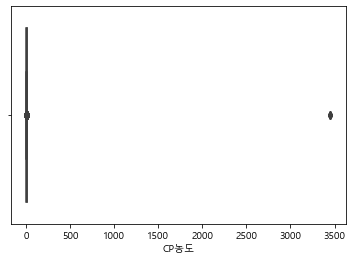

In [156]:
sns.boxplot(dream2['CP농도'])

C:\Users\wonnho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RX_순간유량'>

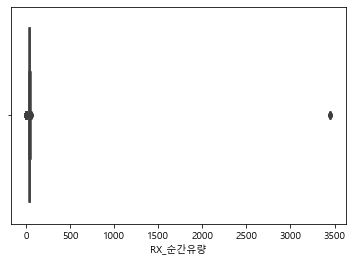

In [157]:
sns.boxplot(dream2['RX_순간유량'])

C:\Users\wonnho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='가열로히터온도'>

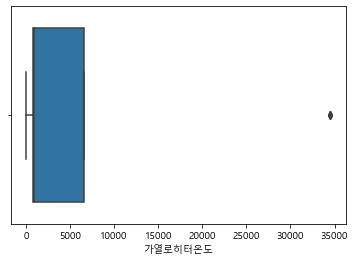

In [176]:
sns.boxplot(dream2['가열로히터온도'])

C:\Users\wonnho\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LNG순간유량'>

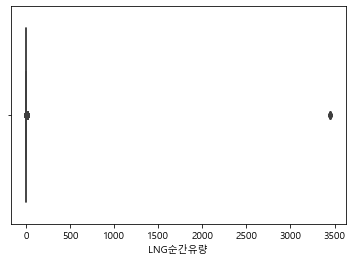

In [177]:
sns.boxplot(dream2['LNG순간유량'])

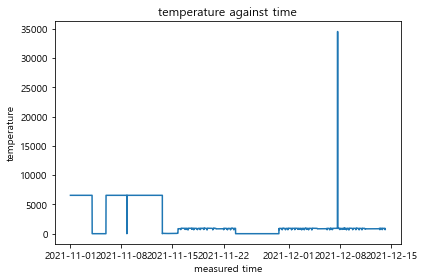

In [159]:

plt.plot(dream2['measuredt'],dream2['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()


# plt.subplot(222)
# plt.plot(dream2['measuredt'],dream2['CP농도'])
# plt.title('CP 농도 against time')
# plt.xlabel('measured time')
# plt.ylabel('CP 농도')
# plt.tight_layout()

# plt.subplot(223)
# plt.plot(dream2['measuredt'],dream2['RX_순간유량'])
# plt.title('RX 순간유량 against time')
# plt.xlabel('measured_time')
# plt.ylabel('RX 순간유량')
# plt.tight_layout()

# plt.subplot(223)
# plt.plot(dream2['measuredt'],dream2['LNG순간유량'])
# plt.title('LNG 순간유량 against time')
# plt.xlabel('measured time')
# plt.ylabel('LNG순간유량')
# plt.tight_layout()

plt.show()

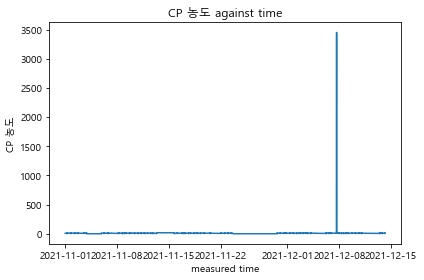

In [160]:
plt.plot(dream2['measuredt'],dream2['CP농도'])
plt.title('CP 농도 against time')
plt.xlabel('measured time')
plt.ylabel('CP 농도')
plt.tight_layout()
plt.show()

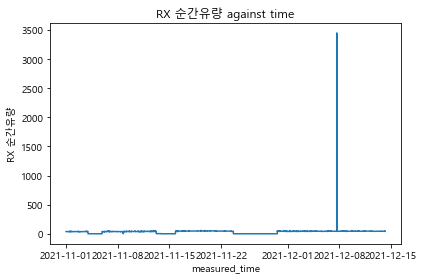

In [142]:
plt.plot(dream2['measuredt'],dream2['RX_순간유량'])
plt.title('RX 순간유량 against time')
plt.xlabel('measured_time')
plt.ylabel('RX 순간유량')
plt.tight_layout()
plt.show()

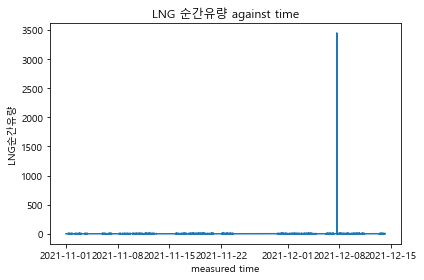

In [143]:
plt.plot(dream2['measuredt'],dream2['LNG순간유량'])
plt.title('LNG 순간유량 against time')
plt.xlabel('measured time')
plt.ylabel('LNG순간유량')
plt.tight_layout()
plt.show()

eliminate the outlier

In [13]:
dream3=dream2[dream2['CP농도']<2000]

In [14]:
dream3.isnull().sum()

measuredt    0
sensor_id    0
가열로히터온도      0
LNG순간유량      0
RX_순간유량      0
CP농도         0
dtype: int64

In [22]:
dream3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53892 entries, 0 to 53898
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   measuredt  53892 non-null  datetime64[ns]
 1   sensor_id  53892 non-null  int64         
 2   가열로히터온도    53892 non-null  float64       
 3   LNG순간유량    53892 non-null  float64       
 4   RX_순간유량    53892 non-null  float64       
 5   CP농도       53892 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 2.9 MB


In [15]:
dream3.describe()

,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
count,53892.000000,53892.000000,53892.000000,53892.000000,53892.000000
mean,226370.646126,2463.265290,1.012536,37.303110,8.465164
std,136019.301960,2666.523981,1.345815,14.035943,3.453461
min,21731.000000,0.000000,0.000000,0.000000,0.000000
25%,100680.250000,829.000000,0.000000,38.000000,6.300000
50%,208180.000000,911.000000,0.100000,42.000000,8.800000
75%,372339.000000,6552.400000,1.900000,44.800000,10.000000
max,441690.000000,6552.400000,7.400000,59.200000,16.600000


In [147]:
dream3.head(21)

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
0,2021-11-01 00:00:00,21731,6552.4,0.0,38.4,7.1
1,2021-11-01 00:01:00,21735,6552.4,0.0,38.4,7.1
2,2021-11-01 00:02:00,21741,6552.4,0.0,38.8,7.1
3,2021-11-01 00:03:00,21746,6552.4,0.0,38.4,7.1
4,2021-11-01 00:04:00,21750,6552.4,0.0,38.4,7.1
5,2021-11-01 00:05:00,21756,6552.4,0.0,38.8,7.1
6,2021-11-01 00:06:00,21761,6552.4,0.0,38.8,7.1
7,2021-11-01 00:07:00,21765,6552.4,0.0,38.4,7.1
8,2021-11-01 00:08:00,21770,6552.4,0.0,38.4,7.1
9,2021-11-01 00:09:00,21775,6552.4,0.0,38.4,7.1


samples graphs after eliminating outliers

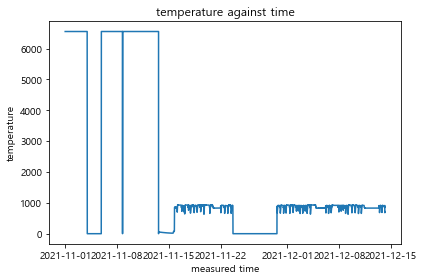

In [180]:
plt.plot(dream3['measuredt'],dream3['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()
plt.show()

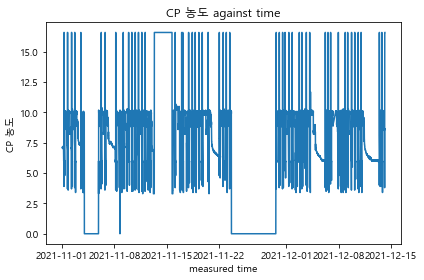

In [150]:
plt.plot(dream3['measuredt'],dream3['CP농도'])
plt.title('CP 농도 against time')
plt.xlabel('measured time')
plt.ylabel('CP 농도')
plt.tight_layout()
plt.show()

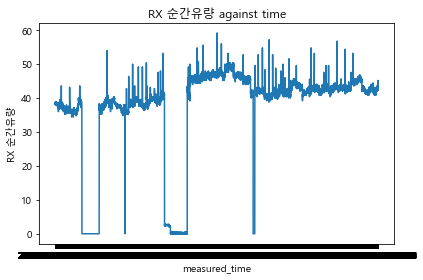

In [133]:
plt.plot(dream3['measuredt'],dream3['RX_순간유량'])
plt.title('RX 순간유량 against time')
plt.xlabel('measured_time')
plt.ylabel('RX 순간유량')
plt.tight_layout()
plt.show()

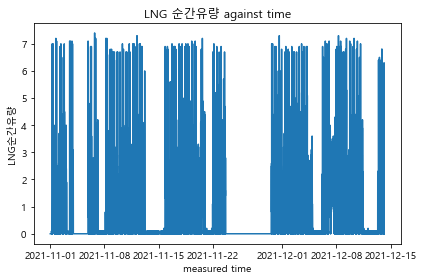

In [151]:
plt.plot(dream3['measuredt'],dream3['LNG순간유량'])
plt.title('LNG 순간유량 against time')
plt.xlabel('measured time')
plt.ylabel('LNG순간유량')
plt.tight_layout()
plt.show()

discard subdataset before 2021-11-17 03:12 and after 2021-12-04 02:47 because they does not have a match data with target dataset

In [16]:
dream4=dream3[(dream3['measuredt']>='2021-11-17 03:12:00') & (dream3['measuredt']<='2021-12-04 02:47:00')]

In [ ]:
#dream4=dream3[(dream['measuredt']>='2021-11-17 03:12:00') & (dream['measuredt']<='2021-12-04 02:47:00')]
# it is possible that measuredt is an object not only datetime

In [190]:
dream4.tail()

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
40274,2021-12-04 02:42:00,371599,868.0,0.0,41.2,6.5
40275,2021-12-04 02:43:00,371604,870.0,0.0,41.6,6.5
40276,2021-12-04 02:44:00,371609,847.0,6.8,41.6,3.8
40277,2021-12-04 02:45:00,371614,780.0,6.9,41.2,4.7
40278,2021-12-04 02:47:00,371623,693.0,0.0,41.6,16.6


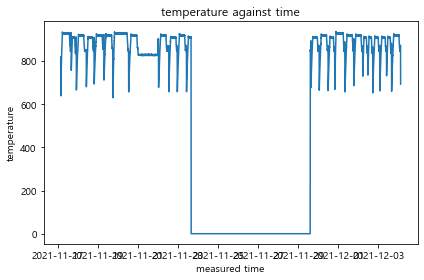

In [191]:
plt.plot(dream4['measuredt'],dream4['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()
plt.show()

=>it looks like furnace does not work in some intervals

Thus cut the interval and remove it

In [24]:
dream4[dream4['가열로히터온도']==0]

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
34658,2021-11-23 15:33:00,258588,0.0,0.0,0.0,0.0
34659,2021-11-23 15:34:00,258595,0.0,0.0,0.0,0.0
34660,2021-11-23 15:35:00,258601,0.0,0.0,0.0,0.0
34661,2021-11-23 15:36:00,258611,0.0,0.0,0.0,0.0
34662,2021-11-23 15:37:00,258621,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
34989,2021-11-29 14:19:00,319646,0.0,0.0,0.0,0.0
34990,2021-11-29 14:20:00,319652,0.0,0.0,0.0,0.0
34991,2021-11-29 14:20:00,319653,0.0,0.0,0.0,0.0
34992,2021-11-29 14:21:00,319658,0.0,0.0,0.0,0.0


In [17]:
dream5=dream4[(dream4['measuredt']<'2021-11-23 15:33:00')]

In [14]:
dream5.head(21)

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
23277,2021-11-17 03:12:00,189219,819.0,6.9,46.0,3.9
23278,2021-11-17 03:13:00,189227,753.0,6.9,46.0,4.6
23279,2021-11-17 03:14:00,189232,716.0,5.1,46.4,16.6
23280,2021-11-17 03:15:00,189238,683.0,0.0,46.0,16.6
23281,2021-11-17 03:16:00,189243,666.0,0.0,46.0,16.6
23282,2021-11-17 03:17:00,189250,653.0,0.0,45.6,16.6
23283,2021-11-17 03:18:00,189257,643.0,0.0,46.0,16.6
23284,2021-11-17 03:19:00,189261,640.0,0.0,46.0,16.6
23285,2021-11-17 03:20:00,189266,640.0,0.0,45.6,16.6
23286,2021-11-17 03:21:00,189272,639.0,0.0,46.0,16.6


In [232]:
dream5.to_excel('dream5.xlsx')

In [18]:
dream6=dream4[(dream4['measuredt']>'2021-11-29 14:21:00')]

In [233]:
dream6.tail(11)

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
40268,2021-12-04 02:36:00,371569,873.0,0.0,41.6,6.6
40269,2021-12-04 02:37:00,371574,870.0,0.0,42.0,6.6
40270,2021-12-04 02:38:00,371579,870.0,0.0,41.2,6.6
40271,2021-12-04 02:39:00,371584,868.0,0.1,41.6,6.5
40272,2021-12-04 02:40:00,371590,870.0,0.0,41.6,6.5
40273,2021-12-04 02:41:00,371594,868.0,0.0,41.6,6.5
40274,2021-12-04 02:42:00,371599,868.0,0.0,41.2,6.5
40275,2021-12-04 02:43:00,371604,870.0,0.0,41.6,6.5
40276,2021-12-04 02:44:00,371609,847.0,6.8,41.6,3.8
40277,2021-12-04 02:45:00,371614,780.0,6.9,41.2,4.7


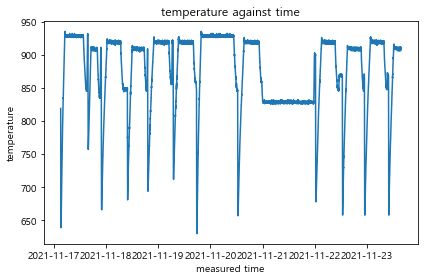

In [225]:
plt.plot(dream5['measuredt'],dream5['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()
plt.show()

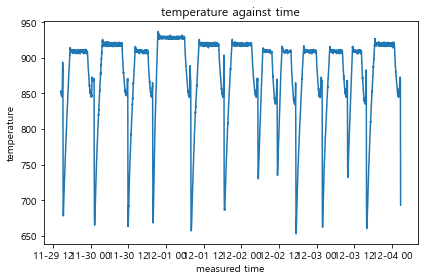

In [226]:
plt.plot(dream6['measuredt'],dream6['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()
plt.show()

In [19]:
dream7=pd.concat([dream5,dream6])

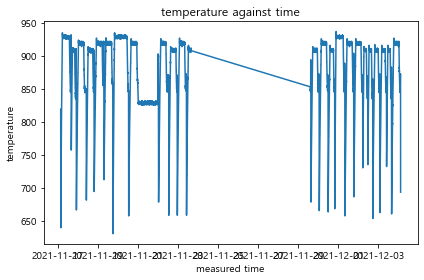

In [228]:
plt.plot(dream7['measuredt'],dream7['가열로히터온도'])
plt.title('temperature against time')
plt.xlabel('measured time')
plt.ylabel('temperature')
plt.tight_layout()
plt.show()

In [20]:
dream5['simulated_data']=dream5['가열로히터온도']-10

C:\Users\wonnho\AppData\Local\Temp/ipykernel_5140/2273432526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dream5['simulated_data']=dream5['가열로히터온도']-10


In [247]:
dream5.head()

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_data
23277,2021-11-17 03:12:00,189219,819.0,6.9,46.0,3.9,809.0
23278,2021-11-17 03:13:00,189227,753.0,6.9,46.0,4.6,743.0
23279,2021-11-17 03:14:00,189232,716.0,5.1,46.4,16.6,706.0
23280,2021-11-17 03:15:00,189238,683.0,0.0,46.0,16.6,673.0
23281,2021-11-17 03:16:00,189243,666.0,0.0,46.0,16.6,656.0


In [21]:
process1=dream5[(dream5['measuredt']<'2021-11-17 21:58:00')]

In [249]:
process1.head()

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_data
23277,2021-11-17 03:12:00,189219,819.0,6.9,46.0,3.9,809.0
23278,2021-11-17 03:13:00,189227,753.0,6.9,46.0,4.6,743.0
23279,2021-11-17 03:14:00,189232,716.0,5.1,46.4,16.6,706.0
23280,2021-11-17 03:15:00,189238,683.0,0.0,46.0,16.6,673.0
23281,2021-11-17 03:16:00,189243,666.0,0.0,46.0,16.6,656.0


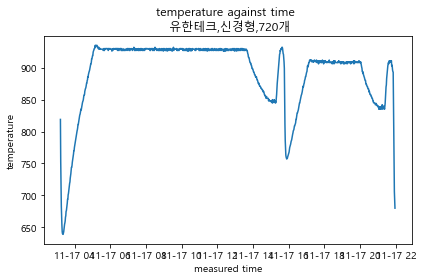

In [250]:
plt.plot(process1['measuredt'],process1['가열로히터온도'])
plt.title('temperature against time \n 유한테크,신경형,720개')
plt.xlabel('measured time')
plt.ylabel('furnace heat temperature')
plt.plot(process1['measuredt'],process1['simulated_data'])
plt.tight_layout()
plt.show()

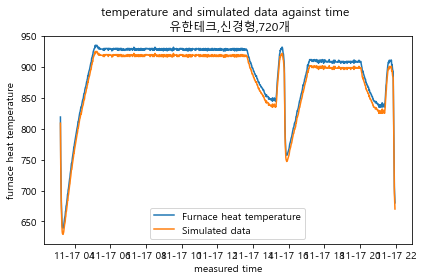

In [255]:
plt.plot(process1['measuredt'],process1['가열로히터온도'],label='Furnace heat temperature')
plt.title('temperature and simulated data against time \n 유한테크,신경형,720개')
plt.xlabel('measured time')
plt.ylabel('furnace heat temperature')
plt.plot(process1['measuredt'],process1['simulated_data'],label='Simulated data')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
process3_4=dream5[(dream5['measuredt']<'2021-11-19 18:40:00') &(dream5['measuredt']>'2021-11-17 21:58:00')]

In [59]:
process3_4.head(13)

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_data
24361,2021-11-17 22:03:00,195847,666.0,0.0,47.2,16.6,656.0
24362,2021-11-17 22:04:00,195851,670.0,0.0,46.4,16.6,660.0
24363,2021-11-17 22:05:00,195857,670.0,0.0,47.2,16.6,660.0
24364,2021-11-17 22:06:00,195866,671.0,0.0,46.8,16.6,661.0
24365,2021-11-17 22:07:00,195869,678.0,0.0,46.8,16.6,668.0
24366,2021-11-17 22:08:00,195875,680.0,0.0,46.8,16.6,670.0
24367,2021-11-17 22:09:00,195881,680.0,0.0,46.8,16.6,670.0
24368,2021-11-17 22:10:00,195887,683.0,0.0,46.4,16.6,673.0
24369,2021-11-17 22:13:00,195901,689.0,0.0,46.8,16.6,679.0
24370,2021-11-17 22:14:00,195909,693.0,0.0,46.8,16.6,683.0


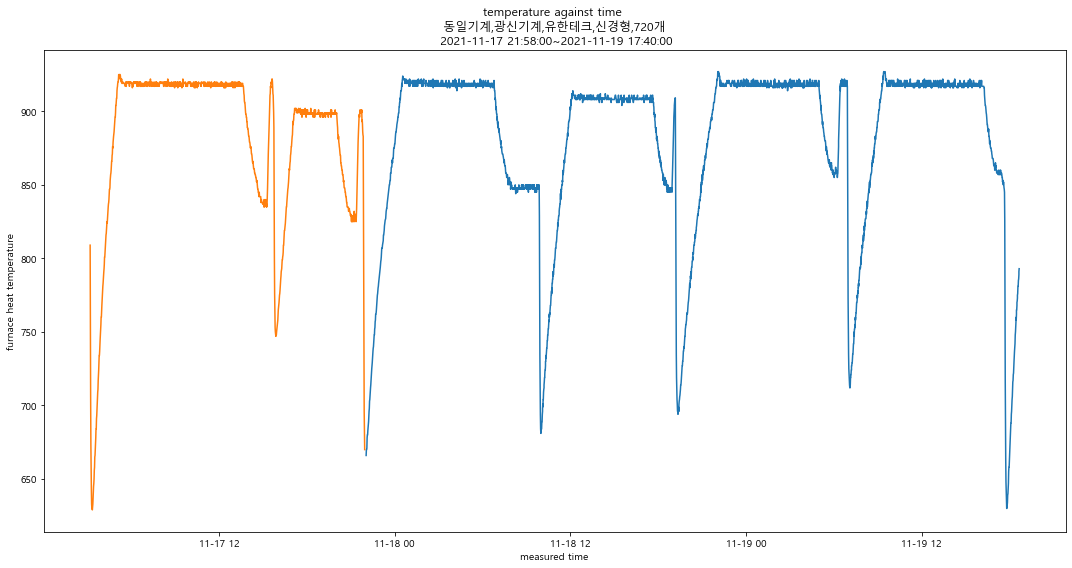

In [60]:
plt.figure(figsize=(15,8))
plt.plot(process3_4['measuredt'],process3_4['가열로히터온도'])
plt.title('temperature against time \n 동일기계,광신기계,유한테크,신경형,720개 \n 2021-11-17 21:58:00~2021-11-19 17:40:00')
plt.xlabel('measured time')
plt.ylabel('furnace heat temperature')
plt.plot(process1['measuredt'],process1['simulated_data'])
plt.tight_layout()
plt.show()

# Simulation

In [22]:
#OP131=dream4[(dream4['measuredt']>='2021-11-17 21:52:00') & (dream4['measuredt']<='2021-11-18 09:52:00')]
OP131=dream4[(dream4['measuredt']>='2021-11-17 22:03:00') & (dream4['measuredt']<='2021-11-18 09:52:00')]

In [41]:
len(dream4[(dream4['measuredt']>='2021-11-17 22:03:00') & (dream4['measuredt']<='2021-11-18 00:46:00')])

142

In [37]:
OP131.head()

,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도
24361,2021-11-17 22:03:00,195847,666.0,0.0,47.2,16.6
24362,2021-11-17 22:04:00,195851,670.0,0.0,46.4,16.6
24363,2021-11-17 22:05:00,195857,670.0,0.0,47.2,16.6
24364,2021-11-17 22:06:00,195866,671.0,0.0,46.8,16.6
24365,2021-11-17 22:07:00,195869,678.0,0.0,46.8,16.6


In [80]:
OP131.shape

(841, 6)

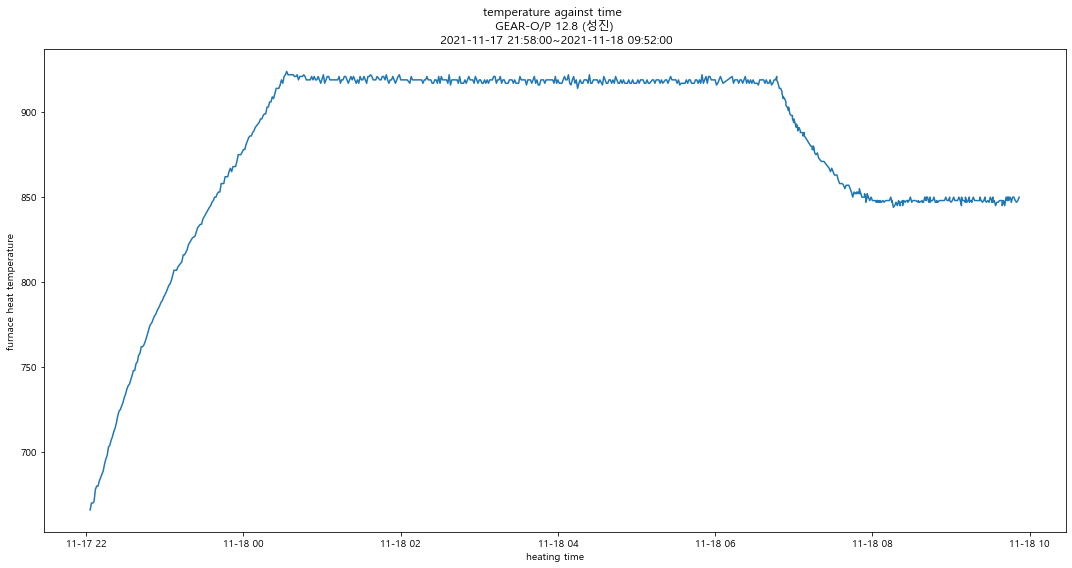

In [115]:
plt.figure(figsize=(15,8))
plt.plot(OP131['measuredt'],OP131['가열로히터온도'])
plt.title('temperature against time \n GEAR-O/P 12.8 (성진) \n 2021-11-17 21:58:00~2021-11-18 09:52:00')
plt.xlabel('heating time')
plt.ylabel('furnace heat temperature')
plt.tight_layout()
plt.show()

In [116]:
simulated_data=[]
c=666
for k in range(0,len(OP131[(OP131['measuredt']>='2021-11-17 22:03:00') & (OP131['measuredt']<='2021-11-18 00:46:00')])):
    c +=1.73
   # simulated_data.append[c]
    print(k,c)
    simulated_data.append(c)

for k in range(0,len(OP131[(OP131['measuredt']<='2021-11-18 06:45:00') & (OP131['measuredt']>='2021-11-18 00:47:00')])):
    c=911
    print(k,c)
    simulated_data.append(c)
    
c=911
for k in range(0,len(OP131[(OP131['measuredt']>='2021-11-18 06:46:00') & (OP131['measuredt']<='2021-11-18 09:52:00')])):
    c-=0.3
    print(k,c)
    simulated_data.append(c)

0 667.73
1 669.46
2 671.19
3 672.9200000000001
4 674.6500000000001
5 676.3800000000001
6 678.1100000000001
7 679.8400000000001
8 681.5700000000002
9 683.3000000000002
10 685.0300000000002
11 686.7600000000002
12 688.4900000000002
13 690.2200000000003
14 691.9500000000003
15 693.6800000000003
16 695.4100000000003
17 697.1400000000003
18 698.8700000000003
19 700.6000000000004
20 702.3300000000004
21 704.0600000000004
22 705.7900000000004
23 707.5200000000004
24 709.2500000000005
25 710.9800000000005
26 712.7100000000005
27 714.4400000000005
28 716.1700000000005
29 717.9000000000005
30 719.6300000000006
31 721.3600000000006
32 723.0900000000006
33 724.8200000000006
34 726.5500000000006
35 728.2800000000007
36 730.0100000000007
37 731.7400000000007
38 733.4700000000007
39 735.2000000000007
40 736.9300000000007
41 738.6600000000008
42 740.3900000000008
43 742.1200000000008
44 743.8500000000008
45 745.5800000000008
46 747.3100000000009
47 749.0400000000009
48 750.7700000000009
49 752.5000000

In [86]:
len(dream4[(dream4['measuredt']>='2021-11-18 06:50:00') & (dream4['measuredt']<='2021-11-18 09:52:00')])

316

In [90]:
c=666
for k in range(0,len(OP131[(OP131['measuredt']>='2021-11-17 22:03:00') & (OP131['measuredt']<='2021-11-18 00:46:00')])):
    c +=1.73
   # simulated_data.append[c]
    print(k,c)
    simulated_data.append(c)

0 667.73
1 669.46
2 671.19
3 672.9200000000001
4 674.6500000000001
5 676.3800000000001
6 678.1100000000001
7 679.8400000000001
8 681.5700000000002
9 683.3000000000002
10 685.0300000000002
11 686.7600000000002
12 688.4900000000002
13 690.2200000000003
14 691.9500000000003
15 693.6800000000003
16 695.4100000000003
17 697.1400000000003
18 698.8700000000003
19 700.6000000000004
20 702.3300000000004
21 704.0600000000004
22 705.7900000000004
23 707.5200000000004
24 709.2500000000005
25 710.9800000000005
26 712.7100000000005
27 714.4400000000005
28 716.1700000000005
29 717.9000000000005
30 719.6300000000006
31 721.3600000000006
32 723.0900000000006
33 724.8200000000006
34 726.5500000000006
35 728.2800000000007
36 730.0100000000007
37 731.7400000000007
38 733.4700000000007
39 735.2000000000007
40 736.9300000000007
41 738.6600000000008
42 740.3900000000008
43 742.1200000000008
44 743.8500000000008
45 745.5800000000008
46 747.3100000000009
47 749.0400000000009
48 750.7700000000009
49 752.5000000

In [89]:
for k in range(0,len(OP131[(OP131['measuredt']<='2021-11-18 06:50:00') & (OP131['measuredt']>='2021-11-18 00:47:00')])):
    c=911
    print(k,c)
    simulated_data.append(c)

0 911
1 911
2 911
3 911
4 911
5 911
6 911
7 911
8 911
9 911
10 911
11 911
12 911
13 911
14 911
15 911
16 911
17 911
18 911
19 911
20 911
21 911
22 911
23 911
24 911
25 911
26 911
27 911
28 911
29 911
30 911
31 911
32 911
33 911
34 911
35 911
36 911
37 911
38 911
39 911
40 911
41 911
42 911
43 911
44 911
45 911
46 911
47 911
48 911
49 911
50 911
51 911
52 911
53 911
54 911
55 911
56 911
57 911
58 911
59 911
60 911
61 911
62 911
63 911
64 911
65 911
66 911
67 911
68 911
69 911
70 911
71 911
72 911
73 911
74 911
75 911
76 911
77 911
78 911
79 911
80 911
81 911
82 911
83 911
84 911
85 911
86 911
87 911
88 911
89 911
90 911
91 911
92 911
93 911
94 911
95 911
96 911
97 911
98 911
99 911
100 911
101 911
102 911
103 911
104 911
105 911
106 911
107 911
108 911
109 911
110 911
111 911
112 911
113 911
114 911
115 911
116 911
117 911
118 911
119 911
120 911
121 911
122 911
123 911
124 911
125 911
126 911
127 911
128 911
129 911
130 911
131 911
132 911
133 911
134 911
135 911
136 911
137 911
138 91

In [88]:
for k in range(0,len(OP131[(OP131['measuredt']>='2021-11-18 06:50:00') & (OP131['measuredt']<='2021-11-18 09:52:00')])):
    c-=0.3
    print(k,c)

0 815.9000000000144
1 815.6000000000145
2 815.3000000000145
3 815.0000000000146
4 814.7000000000146
5 814.4000000000146
6 814.1000000000147
7 813.8000000000147
8 813.5000000000148
9 813.2000000000148
10 812.9000000000149
11 812.6000000000149
12 812.300000000015
13 812.000000000015
14 811.700000000015
15 811.4000000000151
16 811.1000000000151
17 810.8000000000152
18 810.5000000000152
19 810.2000000000153
20 809.9000000000153
21 809.6000000000154
22 809.3000000000154
23 809.0000000000155
24 808.7000000000155
25 808.4000000000156
26 808.1000000000156
27 807.8000000000156
28 807.5000000000157
29 807.2000000000157
30 806.9000000000158
31 806.6000000000158
32 806.3000000000159
33 806.0000000000159
34 805.700000000016
35 805.400000000016
36 805.100000000016
37 804.8000000000161
38 804.5000000000161
39 804.2000000000162
40 803.9000000000162
41 803.6000000000163
42 803.3000000000163
43 803.0000000000164
44 802.7000000000164
45 802.4000000000165
46 802.1000000000165
47 801.8000000000166
48 801.5

In [117]:
simulated_data2=pd.DataFrame(simulated_data)

In [118]:
simulated_data2.shape

(841, 1)

In [119]:
simulated_data2.set_index

<bound method DataFrame.set_index of           0
0    667.73
1    669.46
2    671.19
3    672.92
4    674.65
..      ...
836  815.00
837  814.70
838  814.40
839  814.10
840  813.80

[841 rows x 1 columns]>

In [120]:
simulated_data2

,0
0,667.73
1,669.46
2,671.19
3,672.92
4,674.65
...,...
836,815.00
837,814.70
838,814.40
839,814.10


In [121]:
OP131.reset_index(inplace=True)

In [122]:
OP131_2=pd.merge(OP131,simulated_data2,left_index=True, right_index=True)

In [123]:
OP131_2.rename(columns = {0:'simulated_heating_temperature'}, inplace = True)

In [124]:
OP131_2.columns

Index(['level_0', 'index', 'measuredt', 'sensor_id', '가열로히터온도', 'LNG순간유량',
       'RX_순간유량', 'CP농도', 'simulated_heating_temperature'],
      dtype='object')

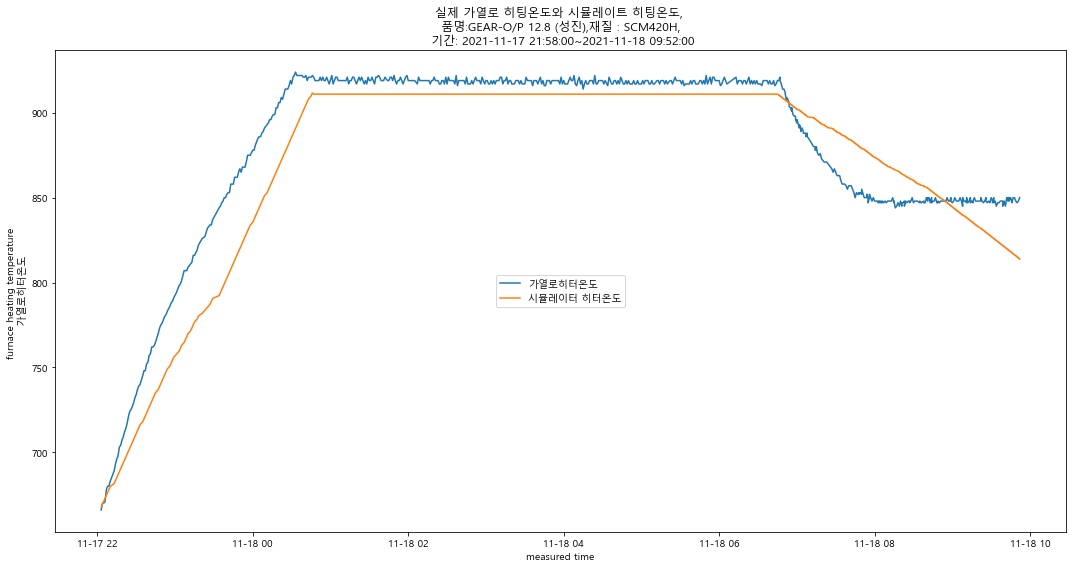

In [126]:
plt.figure(figsize=(15,8))
#plt.rc('font', size=15) 
plt.plot(OP131_2['measuredt'],OP131['가열로히터온도'],label='가열로히터온도')
plt.title('실제 가열로 히팅온도와 시뮬레이트 히팅온도, \n 품명:GEAR-O/P 12.8 (성진),재질 : SCM420H, \n 기간: 2021-11-17 21:58:00~2021-11-18 09:52:00')
plt.xlabel('measured time')
plt.ylabel('furnace heating temperature \n 가열로히터온도')
plt.plot(OP131_2['measuredt'],OP131_2['simulated_heating_temperature'],label='시뮬레이터 히터온도')
plt.legend(loc=10)
plt.tight_layout()
plt.show()

In [89]:
import pickle
import joblib

In [90]:
ridge_reg2=joblib.load('ridge.pkl')

In [34]:
OP131_2.head()

,index,measuredt,sensor_id,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature
0,24361,2021-11-17 22:03:00,195847,666.0,0.0,47.2,16.6,667.73
1,24362,2021-11-17 22:04:00,195851,670.0,0.0,46.4,16.6,669.46
2,24363,2021-11-17 22:05:00,195857,670.0,0.0,47.2,16.6,671.19
3,24364,2021-11-17 22:06:00,195866,671.0,0.0,46.8,16.6,672.92
4,24365,2021-11-17 22:07:00,195869,678.0,0.0,46.8,16.6,674.65


In [35]:
#OP131_2.drop(['level_0','index','sensor_id'],axis=1,inplace=True)
OP131_2.drop(['index','sensor_id'],axis=1,inplace=True)

according to measuredt, distinguish stage

In [36]:
conditions=[
    (OP131_2['measuredt']>='2021-11-17 22:03:00') & (OP131_2['measuredt']<='2021-11-18 00:46:00'),
    (OP131_2['measuredt']<='2021-11-18 06:45:00') & (OP131_2['measuredt']>='2021-11-18 00:47:00'),
    (OP131_2['measuredt']>='2021-11-18 06:46:00') & (OP131_2['measuredt']<='2021-11-18 09:52:00')
            ]
step=['승온','침탄','강온']
OP131_2['step']=np.select(conditions,step)

In [319]:
OP131_2.tail()

,measuredt,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,step
836,2021-11-18 09:50:00,847.0,0.0,46.0,6.4,815.0,강온
837,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.7,강온
838,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.4,강온
839,2021-11-18 09:52:00,850.0,0.0,46.0,6.4,814.1,강온
840,2021-11-18 09:52:00,850.0,0.0,46.0,6.4,813.8,강온


In [37]:
공정시간_step = (((OP131_2.groupby(['step']).measuredt.max()-OP131_2.groupby(['step']).measuredt.min()).astype('str').str[7:9]).astype(int)*60)+((OP131_2.groupby(['step']).measuredt.max()-OP131_2.groupby(['step']).measuredt.min()).astype('str').str[10:12]).astype(int)


In [353]:
공정시간_step

step
강온    186
승온    163
침탄    358
Name: measuredt, dtype: int32

In [38]:
df1 = pd.merge(OP131_2,공정시간_step,left_on='step',right_on='step').rename(columns={'measuredt_y':'공정시간_step'})

In [355]:
df1

,measuredt_x,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,step,공정시간_step
0,2021-11-17 22:03:00,666.0,0.0,47.2,16.6,667.73,승온,163
1,2021-11-17 22:04:00,670.0,0.0,46.4,16.6,669.46,승온,163
2,2021-11-17 22:05:00,670.0,0.0,47.2,16.6,671.19,승온,163
3,2021-11-17 22:06:00,671.0,0.0,46.8,16.6,672.92,승온,163
4,2021-11-17 22:07:00,678.0,0.0,46.8,16.6,674.65,승온,163
...,...,...,...,...,...,...,...,...
836,2021-11-18 09:50:00,847.0,0.0,46.0,6.4,815.00,강온,186
837,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.70,강온,186
838,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.40,강온,186
839,2021-11-18 09:52:00,850.0,0.0,46.0,6.4,814.10,강온,186


In [325]:
df1.describe()

,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,879.083234,1.439358,46.728181,8.628775,871.736849,258.810939
std,50.703341,1.509654,0.645259,1.940515,54.904926,89.380227
min,666.000000,0.000000,45.200000,4.200000,667.730000,163.000000
25%,848.000000,0.000000,46.000000,6.700000,845.900000,186.000000
50%,903.000000,1.000000,46.800000,9.000000,899.550000,186.000000
75%,919.000000,2.700000,47.200000,9.900000,911.000000,358.000000
max,924.000000,7.000000,48.000000,16.600000,911.660000,358.000000


In [39]:
#OP131_2=pd.get_dummies(df1,columns=['step'],drop_first=True)
OP131_2=pd.get_dummies(df1,columns=['step'])

In [469]:
OP131_2

,measuredt_x,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_승온,step_침탄
0,2021-11-17 22:03:00,666.0,0.0,47.2,16.6,667.73,163,0,1,0
1,2021-11-17 22:04:00,670.0,0.0,46.4,16.6,669.46,163,0,1,0
2,2021-11-17 22:05:00,670.0,0.0,47.2,16.6,671.19,163,0,1,0
3,2021-11-17 22:06:00,671.0,0.0,46.8,16.6,672.92,163,0,1,0
4,2021-11-17 22:07:00,678.0,0.0,46.8,16.6,674.65,163,0,1,0
...,...,...,...,...,...,...,...,...,...,...
836,2021-11-18 09:50:00,847.0,0.0,46.0,6.4,815.00,186,1,0,0
837,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.70,186,1,0,0
838,2021-11-18 09:51:00,848.0,0.0,46.0,6.4,814.40,186,1,0,0
839,2021-11-18 09:52:00,850.0,0.0,46.0,6.4,814.10,186,1,0,0


stage:침탄 단계

침탄질화carbonitriding
강의 표면층에 탄소 및 질소를 동시에 확산시키는 조작. 침탄침질이라고도 한다. 처리 방법으로는 침탄성가스에 암모니아를 첨가해서 하는 가스침탄질화 등이 있다.

standardize 5 features

침탄

In [40]:
OP131_2['공정시간_step']=np.where(OP131_2['step_침탄']==1,(OP131_2['공정시간_step']-367.6)/4.07,OP131_2['공정시간_step'])


<!-- t=OP131_2['step_침탄']

new_step= []
for e,i in enumerate(t):
    if i==1:
        time = OP131_2['공정시간_step'][e]
        time = (time-367.6)/4.07
        new_step.append(time)
    else:
        new_step.append(0)
new_step -->
        

#(OP131_2['simulated_heating_temperature']-918.79)/1.68

In [41]:
OP131_2['가열로히터온도']=np.where(OP131_2['step_침탄']==1,(OP131_2['가열로히터온도']-918.79)/1.68,OP131_2['가열로히터온도'])

In [42]:
OP131_2['simulated_heating_temperature']=np.where(OP131_2['step_침탄']==1,(OP131_2['simulated_heating_temperature']-918.79)/1.68,OP131_2['simulated_heating_temperature'])

In [43]:
OP131_2['LNG순간유량']=np.where(OP131_2['step_침탄']==1,(OP131_2['LNG순간유량']-2.16)/1.34,OP131_2['LNG순간유량'])

OP131_2['LNG순간유량']=(OP131_2['LNG순간유량']-2.16)/1.34

In [44]:
OP131_2['CP농도']=np.where(OP131_2['step_침탄']==1,(OP131_2['CP농도']-9.4)/1.06,OP131_2['CP농도'])

OP131_2['CP농도']=(OP131_2['CP농도']-9.4)/1.06

In [45]:
OP131_2['RX_순간유량']=np.where(OP131_2['step_침탄']==1,(OP131_2['RX_순간유량']-43.49)/2.40,OP131_2['RX_순간유량'])

OP131_2['RX순간유량']=(OP131_2['RX순간유량']-43.49)/2.40

승온

In [46]:
OP131_2['공정시간_step']=np.where(OP131_2['step_승온']==1,(OP131_2['공정시간_step']-161.84)/7.94,OP131_2['공정시간_step'])

In [47]:
OP131_2['가열로히터온도']=np.where(OP131_2['step_승온']==1,(OP131_2['가열로히터온도']-807.84)/80.74,OP131_2['가열로히터온도'])

In [48]:
OP131_2['simulated_heating_temperature']=np.where(OP131_2['step_승온']==1,(OP131_2['simulated_heating_temperature']-807.84)/80.74,OP131_2['simulated_heating_temperature'])

In [49]:
OP131_2['LNG순간유량']=np.where(OP131_2['step_승온']==1,(OP131_2['LNG순간유량']-1.33)/1.55,OP131_2['LNG순간유량'])

In [50]:
OP131_2['CP농도']=np.where(OP131_2['step_승온']==1,(OP131_2['CP농도']-8.6)/4.1,OP131_2['CP농도'])

In [51]:
OP131_2['RX_순간유량']=np.where(OP131_2['step_승온']==1,(OP131_2['RX_순간유량']-40.89)/0.33,OP131_2['RX_순간유량'])

강온

In [52]:
OP131_2['공정시간_step']=np.where(OP131_2['step_강온']==1,(OP131_2['공정시간_step']-141.91)/31.47,OP131_2['공정시간_step'])

In [53]:
OP131_2['가열로히터온도']=np.where(OP131_2['step_강온']==1,(OP131_2['가열로히터온도']-862.03)/24.28,OP131_2['가열로히터온도'])

In [54]:
OP131_2['simulated_heating_temperature']=np.where(OP131_2['step_강온']==1,(OP131_2['simulated_heating_temperature']-862.03)/24.28,OP131_2['simulated_heating_temperature'])

In [55]:
OP131_2['LNG순간유량']=np.where(OP131_2['step_강온']==1,(OP131_2['LNG순간유량']-0.74)/1.19,OP131_2['LNG순간유량'])

In [56]:
OP131_2['CP농도']=np.where(OP131_2['step_강온']==1,(OP131_2['CP농도']-8.24)/1.28,OP131_2['CP농도'])

In [57]:
OP131_2['RX_순간유량']=np.where(OP131_2['step_침탄']==1,(OP131_2['RX_순간유량']-40.28)/1.67,OP131_2['RX_순간유량'])

In [99]:
OP131_2.head()

,measuredt_x,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_승온,step_침탄,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500
0,2021-11-17 22:03:00,-1.756750,-0.858065,19.121212,1.95122,-1.735323,0.146096,0,1,0,0,0,0,0,0,1,0
1,2021-11-17 22:04:00,-1.707208,-0.858065,16.696970,1.95122,-1.713896,0.146096,0,1,0,0,0,0,0,0,1,0
2,2021-11-17 22:05:00,-1.707208,-0.858065,19.121212,1.95122,-1.692470,0.146096,0,1,0,0,0,0,0,0,1,0
3,2021-11-17 22:06:00,-1.694823,-0.858065,17.909091,1.95122,-1.671043,0.146096,0,1,0,0,0,0,0,0,1,0
4,2021-11-17 22:07:00,-1.608125,-0.858065,17.909091,1.95122,-1.649616,0.146096,0,1,0,0,0,0,0,0,1,0


In [489]:
OP131_2.tail()

,measuredt_x,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_승온,step_침탄
836,2021-11-18 09:50:00,-0.619028,-0.621849,46.0,-1.4375,-1.936985,1.401017,1,0,0
837,2021-11-18 09:51:00,-0.577842,-0.621849,46.0,-1.4375,-1.949341,1.401017,1,0,0
838,2021-11-18 09:51:00,-0.577842,-0.621849,46.0,-1.4375,-1.961697,1.401017,1,0,0
839,2021-11-18 09:52:00,-0.495470,-0.621849,46.0,-1.4375,-1.974053,1.401017,1,0,0
840,2021-11-18 09:52:00,-0.495470,-0.621849,46.0,-1.4375,-1.986409,1.401017,1,0,0


add columns to simulated model

ㄱ. 품번_OP131-HD100 and step_2침탄: 침탄과 질화가 동시에 이루어짐

In [58]:
OP131_2['열처리_침탄질화']=0  #
OP131_2['품번_BM840-TF000']=0
OP131_2['품번_BM844 TH051']=0
OP131_2['품번_GC04400710']=0
OP131_2['품번_GC04410210']=0
OP131_2['품번_OP131-HD100']=1
OP131_2['품번_OP131-HD500']=0

In [491]:
OP131_2.head()

,measuredt_x,가열로히터온도,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_승온,step_침탄,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500
0,2021-11-17 22:03:00,-1.756750,-0.858065,19.121212,1.95122,-1.735323,0.146096,0,1,0,0,0,0,0,0,1,0
1,2021-11-17 22:04:00,-1.707208,-0.858065,16.696970,1.95122,-1.713896,0.146096,0,1,0,0,0,0,0,0,1,0
2,2021-11-17 22:05:00,-1.707208,-0.858065,19.121212,1.95122,-1.692470,0.146096,0,1,0,0,0,0,0,0,1,0
3,2021-11-17 22:06:00,-1.694823,-0.858065,17.909091,1.95122,-1.671043,0.146096,0,1,0,0,0,0,0,0,1,0
4,2021-11-17 22:07:00,-1.608125,-0.858065,17.909091,1.95122,-1.649616,0.146096,0,1,0,0,0,0,0,0,1,0


In [59]:
OP131_3=OP131_2.drop(['measuredt_x','가열로히터온도','step_승온'],axis=1)

In [506]:
OP131_3.head()

,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_침탄,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500
0,-0.858065,19.121212,1.95122,-1.735323,0.146096,0,0,0,0,0,0,0,1,0
1,-0.858065,16.696970,1.95122,-1.713896,0.146096,0,0,0,0,0,0,0,1,0
2,-0.858065,19.121212,1.95122,-1.692470,0.146096,0,0,0,0,0,0,0,1,0
3,-0.858065,17.909091,1.95122,-1.671043,0.146096,0,0,0,0,0,0,0,1,0
4,-0.858065,17.909091,1.95122,-1.649616,0.146096,0,0,0,0,0,0,0,1,0


In [507]:
OP131_3.tail()

,LNG순간유량,RX_순간유량,CP농도,simulated_heating_temperature,공정시간_step,step_강온,step_침탄,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500
836,-0.621849,46.0,-1.4375,-1.936985,1.401017,1,0,0,0,0,0,0,1,0
837,-0.621849,46.0,-1.4375,-1.949341,1.401017,1,0,0,0,0,0,0,1,0
838,-0.621849,46.0,-1.4375,-1.961697,1.401017,1,0,0,0,0,0,0,1,0
839,-0.621849,46.0,-1.4375,-1.974053,1.401017,1,0,0,0,0,0,0,1,0
840,-0.621849,46.0,-1.4375,-1.986409,1.401017,1,0,0,0,0,0,0,1,0


No column, set, in OP131_2 dataset

In [494]:
OP131_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 841 entries, 0 to 840
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   LNG순간유량                        841 non-null    float64
 1   RX_순간유량                        841 non-null    float64
 2   CP농도                           841 non-null    float64
 3   simulated_heating_temperature  841 non-null    float64
 4   공정시간_step                      841 non-null    float64
 5   step_강온                        841 non-null    uint8  
 6   step_침탄                        841 non-null    uint8  
 7   열처리_침탄질화                       841 non-null    int64  
 8   품번_BM840-TF000                 841 non-null    int64  
 9   품번_BM844 TH051                 841 non-null    int64  
 10  품번_GC04400710                  841 non-null    int64  
 11  품번_GC04410210                  841 non-null    int64  
 12  품번_OP131-HD100                 841 non-null    int

In [60]:
OP131_4=OP131_3[['공정시간_step','simulated_heating_temperature','LNG순간유량','CP농도','RX_순간유량','열처리_침탄질화','품번_BM840-TF000', '품번_BM844 TH051',
       '품번_GC04400710', '품번_GC04410210', '품번_OP131-HD100', '품번_OP131-HD500','step_침탄','step_강온']]

In [510]:
OP131_4.head()

,공정시간_step,simulated_heating_temperature,LNG순간유량,CP농도,RX_순간유량,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500,step_침탄,step_강온
0,0.146096,-1.735323,-0.858065,1.95122,19.121212,0,0,0,0,0,1,0,0,0
1,0.146096,-1.713896,-0.858065,1.95122,16.696970,0,0,0,0,0,1,0,0,0
2,0.146096,-1.692470,-0.858065,1.95122,19.121212,0,0,0,0,0,1,0,0,0
3,0.146096,-1.671043,-0.858065,1.95122,17.909091,0,0,0,0,0,1,0,0,0
4,0.146096,-1.649616,-0.858065,1.95122,17.909091,0,0,0,0,0,1,0,0,0


In [511]:
OP131_4.tail()

,공정시간_step,simulated_heating_temperature,LNG순간유량,CP농도,RX_순간유량,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500,step_침탄,step_강온
836,1.401017,-1.936985,-0.621849,-1.4375,46.0,0,0,0,0,0,1,0,0,1
837,1.401017,-1.949341,-0.621849,-1.4375,46.0,0,0,0,0,0,1,0,0,1
838,1.401017,-1.961697,-0.621849,-1.4375,46.0,0,0,0,0,0,1,0,0,1
839,1.401017,-1.974053,-0.621849,-1.4375,46.0,0,0,0,0,0,1,0,0,1
840,1.401017,-1.986409,-0.621849,-1.4375,46.0,0,0,0,0,0,1,0,0,1


In [152]:
OP131_4[OP131_4['step_강온'] == 1].head()

,공정시간_step,simulated_heating_temperature,LNG순간유량,CP농도,RX_순간유량,열처리_침탄질화,품번_BM840-TF000,품번_BM844 TH051,품번_GC04400710,품번_GC04410210,품번_OP131-HD100,품번_OP131-HD500,step_침탄,step_강온
517,1.401017,2.004530,3.579832,0.828125,47.6,0,0,0,0,0,1,0,0,1
518,1.401017,1.992175,3.579832,0.828125,47.6,0,0,0,0,0,1,0,0,1
519,1.401017,1.979819,1.394958,0.984375,47.2,0,0,0,0,0,1,0,0,1
520,1.401017,1.967463,0.134454,1.062500,47.2,0,0,0,0,0,1,0,0,1
521,1.401017,1.955107,-0.621849,1.218750,47.6,0,0,0,0,0,1,0,0,1


load model,ridge.pkl, from dream_remodelling2. model already saved from the 

In [61]:
ridge_reg=joblib.load('ridge.pkl')

In [62]:
predicted_depth=ridge_reg.predict(OP131_4)

In [63]:
predicted_depth.size

841

In [64]:
ridge_predicted=pd.DataFrame(predicted_depth)

In [65]:
ridge_predicted.describe()

,0
count,841.000000
mean,0.570626
std,0.456714
min,0.031826
25%,0.058778
50%,0.467755
75%,1.054454
max,1.061937


=> results look good, all of which are in range of 0.5mm~2mm

In [ ]:
#1. 반복회수는 원하는 만큼 정한다.
#2. 품번은 5번을 선택(다른 품번은 아직 설정하지 않았다.)
#3. 주어진 안내문장에 따라 승온, 침탄, 강온 단계를 입력한다.
#4. 주어진 조건에 따라 입력하면 된다.
#5. 아래 그림을 실행하면 점이 나타난다.

In [256]:
# iter 횟수 입력
iter_ = int(input('시뮬레이션 횟수를 입력 하시오 : \n'))

#########################################

#we test only 품번_OP131-HD100
modify = OP131_4.copy()
modify['품번_OP131-HD100']= OP131_4['품번_OP131-HD100'].copy()
print()
product_names = dict({1:'GC04400710', 2:'45753-02400', 3:'OP131-HD100', 4:'BM844 TH051', 5:'OP131-HD500', 6:'BM840-TF000', 7:'GC04410210'})
print(product_names) #품번 list
print()
for i in range(iter_) :
    product_no = int(input('품번에 해당하는 번호를 입력하시오 : \n'))
    print(product_names[product_no])

    
    while 1:
        stage1,stage2=map(int,input("공정단계를 입력하세요 : 다음과 같은 형식으로 입력하세요 승온:0-0, 침탄:1-0, 강온:0-1 \n").split('-'))
        print(stage1,stage2) #품번 list
        print( )

        if stage1 == 0 :
            #승온
            if stage2 == 0:
                print('승온')
                while 1: 
                    time=int(input('5분에서 170분사이의 시간을 입력하세요:\n'))
                    check= time<=170 and time>=5
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 시간을 다시 입력하세요')
                while 1:       
                    temperature = int(input('660도에서 930사이의 온도를 입력하세요: \n'))
                    check= temperature<=930 and temperature>=660
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 온도를 다시 입력하세요')
                while 1:
                    LNG= float(input('0에서 6.9사이의 LNG값을 입력하세요: \n'))
                    check= LNG<=6.9 or LNG>0
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. LNG를 다시 입력하세요')
                while 1:
                    CP= float(input('3.8에서 16.6사이의 CP값을 입력하세요: \n'))
                    check= CP<=16.6 and CP>=3.8
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. CP를 다시 입력하세요')                        
                while 1:
                    RX= float(input('40에서 41.6사이의 RX값을 입력하세요: \n'))
                    check= RX<=41.6 and RX>=40
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. RX를 다시 입력하세요')
                
     
                scaled_time=(time- 161.84)/7.94
                print('표준화된 시간은:',scaled_time,end="")
                print('입니다')
                scaled_temp=(temperature-807.84)/80.74
                print('표준화된 온도는:',scaled_temp,end="")
                print('도 입니다')
                scaled_LNG=(LNG-1.33)/1.55
                print('표준화된 LNG는:',scaled_LNG,end="")
                print(' 입니다')
                scaled_CP=(CP-8.6)/4.1
                print('표준화된 CP는:',scaled_CP,end="")
                print(' 입니다')
                scaled_RX=(RX-40.89)/0.33
                print('표준화된 RX는:',scaled_RX,end="")
                print(' 입니다')
                break
       #     break
            # 강온
            elif stage2 == 1:
                print('강온')
                
                while 1 :
                    time=int(input('105분에서 180분 사이의 시간을 입력하세요:\n'))
                    check= time<=180 and time>=105
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:
                    temperature = int(input('670도에서 920사이의 온도를 입력하세요: \n'))
                    check= temperature<=920 and temperature>=670
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:
                    LNG= float(input('0에서 5.7사이의 LNG값을 입력하세요: \n'))
                    check= LNG<=5.7 and LNG>=0
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:
                    CP= float(input('3.6에서 16.6사이의 CP값을 입력하세요: \n'))
                    check= CP<=16.6 and CP>=3.6
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:
                    RX= float(input('39에서 57사이의 RX값을 입력하세요: \n'))
                    check= RX<57 and RX>=39
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                    
           
                scaled_time=(time-141.91)/31.47
                print('표준화된 시간은:',scaled_time,end="")
                print(' 입니다')
                scaled_temp=(temperature-862.03)/24.28
                print('표준화된 온도는:',scaled_temp,end="")
                print('도 입니다')
                scaled_LNG=(LNG-0.74)/1.19
                print('표준화된 LNG는:',scaled_LNG,end="")
                print(' 입니다')
                scaled_CP=(CP-8.24)/1.28
                print('표준화된 CP는:',scaled_CP,end="")
                print(' 입니다')
                scaled_RX=(RX-40.28)/1.67
                print('표준화된 RX는:',scaled_RX,end="")
                print(' 입니다')
                break
#        else :
 #           print('잘못입력했습니다. 다시 입력하세요')


        #침탄
        elif stage1==1 :
            if stage2==0:
                print('침탄')
                while 1: 
                    time=int(input('362분에서 373분 사이의 시간을 입력하세요:\n'))
                    check = time>=362 and time<=373
                    if check:
                        break
                    else:
                        
                        print('잘못입력했습니다. 다시 입력하세요')
                
                while 1: 
                    temperature = int(input('910도에서 930사이의 온도를 입력하세요: \n'))
                    check= temperature<=930 and temperature>=910
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1: 
                    LNG= float(input('0에서 7사이의 LNG값을 입력하세요: \n'))
                    check= LNG<=7 or LNG>=0
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:        
                    CP= float(input('3.4에서 10.2사이의 CP값을 입력하세요: \n'))
                    check= CP<=10.2 and CP>=3.4
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요')
                while 1:        
                    RX= float(input('40에서 47사이의 RX값을 입력하세요: \n'))
                    check= RX<=47 and RX>=40
                    if check:
                        break
                    else:
                        print('잘못입력했습니다. 다시 입력하세요3')

                scaled_time=(time-367.6)/4.07
                print('표준화된 시간은:',scaled_time,end="")
                print(' 입니다')
                scaled_temp=(temperature-918.79)/1.68
                print('표준화된 온도는:',scaled_temp,end="")
                print('도 입니다')
                scaled_LNG=(LNG-2.16)/1.34
                print('준화된 LNG는:',scaled_LNG,end="")
                print(' 입니다')
                scaled_CP=(CP-9.4)/1.06
                print('표준화된 CP는:',scaled_CP,end="")
                print(' 입니다')
                scaled_RX=(RX-43.49)/2.40
                print('표준화된 RX는:',scaled_RX,end="")
                print(' 입니다')

            break
        else : 
            print('잘못입력했습니다. 다시 입력하세요5')

    # else:
    #     print('잘못입력했습니다. 다시 입력하세요6')




    input_=[time,scaled_temp,scaled_LNG,CP,RX,0,0,0,0,0,1,0,stage1,stage2]
    predicted_depth=ridge_reg2.predict(pd.DataFrame(input_).T)
    print('예측한 경화깊이는:',predicted_depth)

#입력 횟수에 맞는 데이터 크기 조정
#i = 0
#select_final = pd.DataFrame()
#while i < iter_: 
#    select_final = select_final.append(select_df2)
#    i+=1 

시뮬레이션 횟수를 입력 하시오 : 
1

{1: 'GC04400710', 2: '45753-02400', 3: 'OP131-HD100', 4: 'BM844 TH051', 5: 'OP131-HD500', 6: 'BM840-TF000', 7: 'GC04410210'}

품번에 해당하는 번호를 입력하시오 : 
5
OP131-HD500
공정단계를 입력하세요 : 다음과 같은 형식으로 입력하세요 승온:0-0, 침탄:1-0, 강온:0-1 
0-0
0 0

승온
5분에서 170분사이의 시간을 입력하세요:
11
660도에서 930사이의 온도를 입력하세요: 
679
0에서 6.9사이의 LNG값을 입력하세요: 
5
3.8에서 16.6사이의 CP값을 입력하세요: 
5
40에서 41.6사이의 RX값을 입력하세요: 
41
표준화된 시간은: -18.997481108312343입니다
표준화된 온도는: -1.5957394104533074도 입니다
표준화된 LNG는: 2.367741935483871 입니다
표준화된 CP는: -0.8780487804878049 입니다
표준화된 RX는: 0.3333333333333316 입니다
예측한 경화깊이는: [0.15223233]


## Note: 시간과 온도를 잘 설정해야 시뮬레이터 곡선에 점이 위치할 수 있다.

679
11


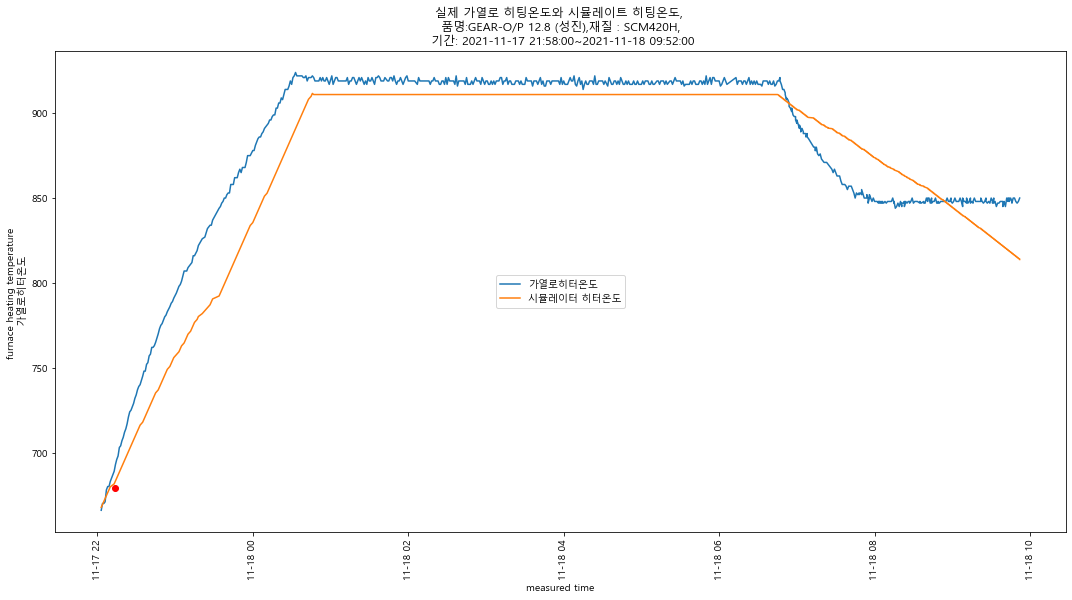

In [257]:
import datetime

plt.figure(figsize=(15,8))

# input_time = '2021-11-18 00:03:00' # str
# input_temperature = 840 # int

plt.title('실제 가열로 히팅온도와 시뮬레이트 히팅온도, \n 품명:GEAR-O/P 12.8 (성진),재질 : SCM420H, \n 기간: 2021-11-17 21:58:00~2021-11-18 09:52:00')
plt.xlabel('measured time')
plt.ylabel('furnace heating temperature \n 가열로히터온도')

plt.plot(OP131['measuredt'], OP131['가열로히터온도'], label='가열로히터온도')
plt.plot(OP131_2['measuredt'], OP131_2['simulated_heating_temperature'], label='시뮬레이터 히터온도')

plt.legend(loc=10)
plt.tight_layout()

# 교차점 나타내기
# idx = np.argwhere(np.diff(np.sign(OP131['가열로히터온도'] - OP131_2['simulated_heating_temperature']))).flatten()
# plt.plot(OP131['measuredt'][idx], OP131['가열로히터온도'][idx], 'ro')
# plt.xticks(rotation = 90)

print(temperature)
print(time)
# 필터를 이용하여 데이터를 찾은 후 포인트 찍기
# tmp = OP131_2[OP131_2['simulated_heating_temperature'].apply(lambda x: int(x)) == temperature]
# tmp = tmp[tmp['measuredt'] == OP131_2['measuredt'].min() + datetime.timedelta(minutes=time)]
# plt.plot(tmp['measuredt'],tmp['simulated_heating_temperature'],'ro')
# plt.xticks(rotation = 90)

# 그냥 지정된 위치에 포인트 찍기
if stage1 == 0 and stage2 == 0: tmp_time = OP131_2['measuredt'].min()   # 승온
elif stage1 == 1 and stage2 == 0 : tmp_time = OP131_2['measuredt'].min() + datetime.timedelta(minutes=153) # 침탄
elif stage1 == 0 and stage2 == 1 : tmp_time = OP131_2['measuredt'].min() + datetime.timedelta(minutes=153) + datetime.timedelta(minutes=375)# 강온
tmp_time = tmp_time + datetime.timedelta(minutes=time)

plt.plot(pd.Series(tmp_time),pd.Series(float(temperature)),'ro')
plt.xticks(rotation = 90)

plt.show()